### What are the most demaded skills for the top 3 most popular data roles 

#### Methodology 
1) Extract the job skills column so each list item has its own row 
2) Calculate skill counts based on each job title
3) Calculate skill percentage 
4) Plot final findings 

In [1]:
#Importing Libraries 

import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#Loading Data 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup 

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [ ]:
# Creating a new data frame with jobs that are located in the United States
df_us = df[df['job_country'] == 'United States']


#Creating a new data frame with the list of job skills exploded into individual rows
df_skills = df_us.explode('job_skills')


In [ ]:
#Using group by to find a count of job_titles each skill is associated with 
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

#resetting the index 
df_skills_count = df_skills_count.reset_index(name='skills_count')

#sort values by most in demand skills 
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)

df_skills_count


,job_title_short,job_skills,skills_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


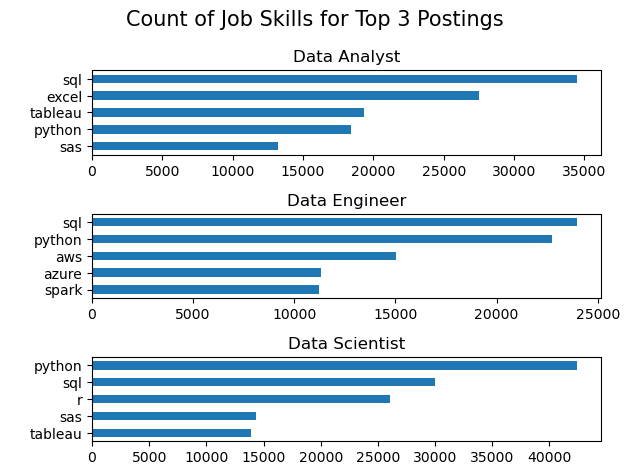

In [34]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])


fig, ax = plt.subplots(len(job_titles), 1)

#Creating a for loop to plot each seperate job_title that I mentioned in my list

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel(' ')
    ax[i].legend().set_visible(False)

fig.suptitle(f'Count of Job Skills for Top {len(job_titles)} Postings', fontsize=15)
plt.tight_layout()
plt.show()

In [37]:
df_job_title_count = df_us['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [42]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc


,job_title_short,job_skills,skills_count,jobs_total
0,Data Scientist,python,42379,58830
1,Data Analyst,sql,34452,67816
2,Data Scientist,sql,30034,58830
3,Data Analyst,excel,27519,67816
4,Data Scientist,r,26022,58830
...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289
1866,Cloud Engineer,ms access,1,423
1867,Machine Learning Engineer,graphql,1,921
1868,Senior Data Scientist,mariadb,1,12946


In [45]:
df_skills_perc['skill_percent'] = 100 * df_skills_perc['skills_count']/df_skills_perc['jobs_total']

df_skills_perc

,job_title_short,job_skills,skills_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


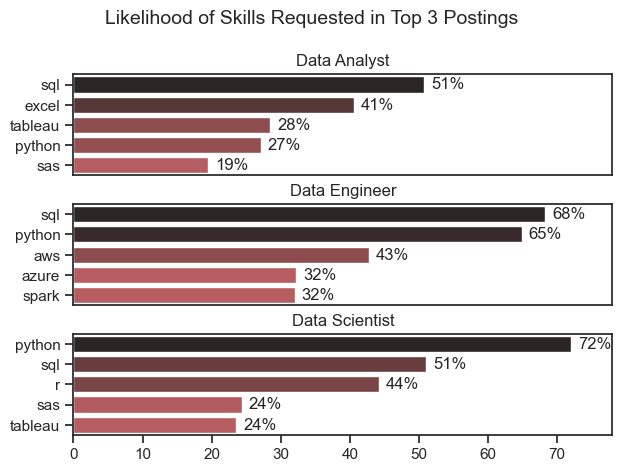

In [78]:
#Creating the same figure but this time utilizing percentage of jobs with the skill

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
#Creating a for loop to plot each seperate job_title that I mentioned in my list

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head()
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_percent', palette='dark:r_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
    
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va = 'center')


fig.suptitle(f'Likelihood of Skills Requested in Top {len(job_titles)} Postings', fontsize=14)
fig.tight_layout(h_pad=0.5)
plt.show()